In [116]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# !pip install -U ipykernel

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['text.latex.preamble'] = ''.join([r'\usepackage{siunitx}', r'\usepackage{amsmath}'])
plt.style.use('seaborn-dark')

import numpy as np
import os
import csv
import pandas as pd

C:\Users\DELL\AppData\Local\Temp/ipykernel_11496/2997307906.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [118]:
### PLOT CONSTANTS
line_widt = 3
font_size = 1 * 15
off_set = 0.2
marker_size = 5 * 3 
line_width_robot = 5 * 3
TIME_2_PAUSE_PLOT = 0.5
WANNA_SAVE_BIG = False
ITER2SAVE = 10
PRINT_ONE = True
label_list_cart = [r'X',r'Y',r'Z']
color_list = ['r', 'g', 'b', 'm', 'k', 'c', 'y']
label_list_q_pcc = [r'$\phi$',r'$\theta$', r'$\delta L$']
label_list_q_dot_pcc = [r'$\dot{\phi}$',r'$\dot{\theta}$', r'$\dot{\delta L}$']
label_list_q_ddot_pcc = [r'$\ddot{\phi}$',r'$\ddot{\theta}$', r'$\ddot{\delta L}$']
label_list_y_pcc = [r'$\phi$', r'$\theta$', r'$\delta L$']

label_list_q = [r'$\Delta_x$',r'$\Delta_x$', r'$\delta L$']
label_list_q_dot = [r'$\dot{\Delta_x}$',r'$\dot{\Delta_y}$', r'$\dot{\delta L}$']
label_list_q_ddot = [r'$\ddot{\Delta_x}$',r'$\ddot{\Delta_y}$', r'$\ddot{\delta L}$']
label_list_y = [r'$\Delta_x$', r'$\Delta_y$', r'$\delta L$']

In [119]:
## Solution 1)
# file_path = os.getcwd() + "\EXP_16_03_2023\Test_EXP_008_16_03_2023_piego_random\dataset_1.csv"
# file_path = os.getcwd() + "\EXP_20_03_2023\decenti\Test_EXP_011_20_03_2023_piego_12_2_iter6\dataset_6.csv"
# file_path = os.getcwd() + "\Test_000_STREAMING_DATA_26_04_2022\dataset_stream.csv"

# file_path = os.getcwd() + "\Test_002_STREAMING_DATA_26_04_2022_moving_12\dataset_stream.csv"
# file_path = os.getcwd() + "\Test_002_STREAMING_DATA_26_04_2022_moving_24\dataset_stream.csv"
# file_path = os.getcwd() + "\Test_002_STREAMING_DATA_26_04_2022_moving_34\dataset_stream.csv"
file_path = os.getcwd() + "\Test_002_STREAMING_DATA_26_04_2022_moving_13\dataset_stream.csv"


## Solution 2)
# import tkinter as tk
# from tkinter import filedialog
# # Create a tkinter window
# root = tk.Tk()
# root.withdraw()
# # Open a file dialog and allow the user to select a file
# file_path = filedialog.askopenfilename()

In [120]:
## Solution 3)
# import ipywidgets as widgets
# from IPython.display import display

# # Create a file upload widget
# uploader = widgets.FileUpload()

# # Display the file upload widget
# display(uploader)

# # Load the selected file into a dataframe using pandas
# if uploader.value:
#     file_path = list(uploader.value.keys())[0]
#     # do something with the dataframe

In [121]:
print(file_path)
# Load the CSV file into a dataframe
df = pd.read_csv(file_path)

# Access the columns using their headers
time = df['time']
measured_load_1 = df['measured_load_1']
measured_load_2 = df['measured_load_2']
measured_load_3 = df['measured_load_3']
measured_load_4 = df['measured_load_4']
IMU_x = df['IMU_x']
IMU_y = df['IMU_y']
IMU_z = df['IMU_z']
IMU_rad_x = df['IMU_rad_x']
IMU_rad_y = df['IMU_rad_y']
IMU_rad_z = df['IMU_rad_z']
IMU_gx = df['IMU_gx']
IMU_gy = df['IMU_gy']
IMU_gz = df['IMU_gz']
# pos_M1 = df['pos_M1']
# pos_M2 = df['pos_M2']
# pos_M3 = df['pos_M3']
# pos_M4 = df['pos_M4']
current_input1 = df['current_input1']
current_input2 = df['current_input2']
current_input3 = df['current_input3']
current_input4 = df['current_input4']
# u_old_1 = df['u_old_1']
# u_old_2 = df['u_old_2']
# u_old_3 = df['u_old_3']
# u_old_4 = df['u_old_4']
phi = df['phi']
theta = df['theta']
dL = df['dL']
# phi_des = df['phi_des']
# theta_des = df['theta_des']
# dL_des = df['dL_des']

Delta_x = df['Delta_x']
Delta_y = df['Delta_y']
dL = df['dL']



c:\Users\DELL\Dropbox\MichelePierallini\FUTURE_WORK\DelftNeck\dlrneck_tudelft_my_main_may\python\Test_002_STREAMING_DATA_26_04_2022_moving_13\dataset_stream.csv


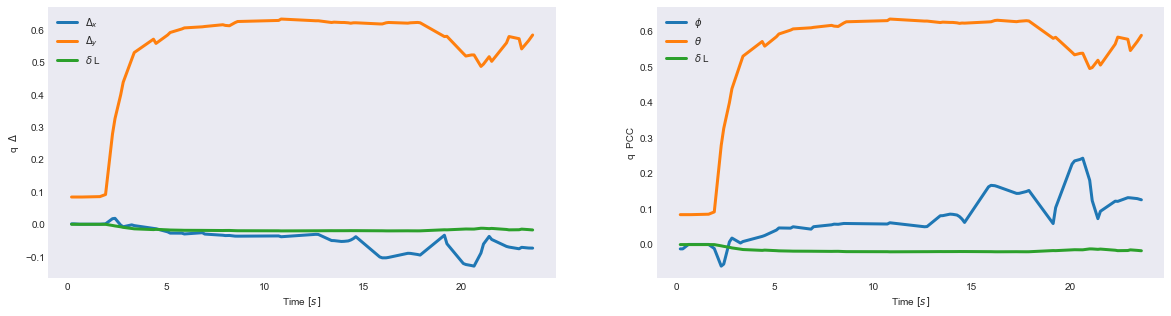

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(time, Delta_x, label= r'$\Delta_x$', linewidth=line_widt)
axs[0].plot(time, Delta_y, label= r'$\Delta_y$' , linewidth=line_widt)
axs[0].plot(time, dL, label= r'$\delta$ L', linewidth=line_widt)
axs[0].set_xlabel(r'Time $[s]$')
axs[0].set_ylabel(r'q  $\Delta$')
axs[0].legend(loc='best')


axs[1].plot(time, phi, label= r'$\phi$', linewidth=line_widt)
axs[1].plot(time, theta, label= r'$\theta$' , linewidth=line_widt)
axs[1].plot(time, dL, label= r'$\delta$ L', linewidth=line_widt)
axs[1].set_xlabel(r'Time $[s]$')
axs[1].set_ylabel(r'q  PCC')
axs[1].legend(loc='best')

plt.show()

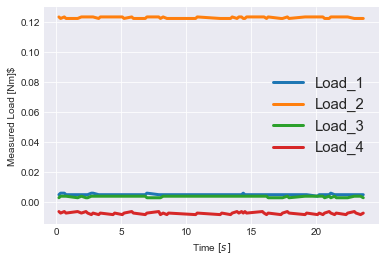

In [123]:
#%%
plt.figure()
plt.ylabel(r'Measured Load [Nm]$')
plt.xlabel(r'Time $[s]$')
plt.plot(time, measured_load_1, label= 'Load_1', linewidth=line_widt)
plt.plot(time, measured_load_2, label= 'Load_2', linewidth=line_widt)
plt.plot(time, measured_load_3, label= 'Load_3', linewidth=line_widt)
plt.plot(time, measured_load_4, label= 'Load_4', linewidth=line_widt)
plt.grid()
plt.legend(loc='best', shadow = True, fontsize=font_size)
plt.show() 

In [124]:
# plt.figure(clear=True)
# plt.ylabel(r'Action New $[Nm]$')
# plt.xlabel(r'Time $[s]$')
# plt.plot(time, u_old_1, label= 'u_1', linewidth=line_widt)
# plt.plot(time, u_old_2, label= 'u_2', linewidth=line_widt)
# plt.plot(time, u_old_3, label= 'u_3', linewidth=line_widt)
# plt.plot(time, u_old_4, label= 'u_4', linewidth=line_widt)
# plt.grid()
# plt.legend(loc='best', shadow = True, fontsize=font_size) 
# plt.show()

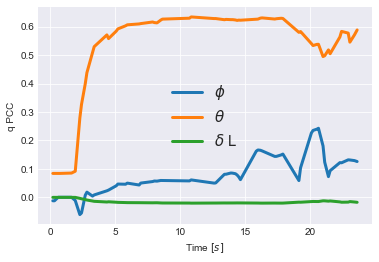

In [125]:
plt.figure(clear=True)
plt.plot(time, phi, label= r'$\phi$', linewidth=line_widt)
plt.plot(time, theta, label= r'$\theta$' , linewidth=line_widt)
plt.plot(time, dL, label= r'$\delta$ L', linewidth=line_widt)
plt.grid()
plt.ylabel(r'q PCC')
plt.xlabel(r'Time $[s]$')
plt.legend(loc='best', shadow = True, fontsize=font_size)
plt.show()

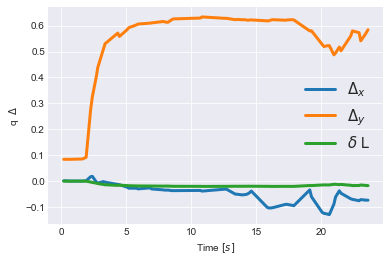

In [126]:
plt.figure(clear=True)
plt.plot(time, Delta_x, label= r'$\Delta_x$', linewidth=line_widt)
plt.plot(time, Delta_y, label= r'$\Delta_y$' , linewidth=line_widt)
plt.plot(time, dL, label= r'$\delta$ L', linewidth=line_widt)
plt.grid()
plt.ylabel(r'q  $\Delta$')
plt.xlabel(r'Time $[s]$')
plt.legend(loc='best', shadow = True, fontsize=font_size)
plt.show()

In [127]:
# plt.figure(clear=True)
# plt.plot(time, phi_des, label= r'$\phi$ Des', linewidth=line_widt, linestyle='-')
# plt.plot(time, phi, label= r'$\phi$', linewidth=line_widt,linestyle='-.')
# plt.plot(time, theta_des, label= r'$\theta$ Des', linewidth=line_widt, linestyle='-')
# plt.plot(time, theta, label= r'$\theta$' , linewidth=line_widt, linestyle='-.')
# plt.plot(time, dL_des, label= r'$\theta$ Des', linewidth=line_widt, linestyle='-')
# plt.plot(time, dL, label= r'$\delta$ L', linewidth=line_widt, linestyle='-.')
# plt.grid()
# plt.ylabel(r'q')
# plt.xlabel(r'Time $[s]$')
# plt.legend(loc='best', shadow = True, fontsize=font_size)
# plt.show()

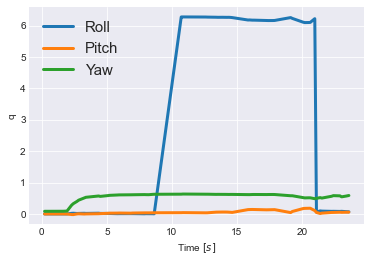

In [128]:
plt.figure(clear=True)
plt.ylabel(r'q')
plt.xlabel(r'Time $[s]$')
plt.plot(time, IMU_rad_x, label='Roll', linewidth=line_widt)
plt.plot(time, IMU_rad_y, label= 'Pitch' , linewidth=line_widt)
plt.plot(time, IMU_rad_z, label= 'Yaw', linewidth=line_widt)
plt.grid()
plt.legend(loc='best', shadow = True, fontsize=font_size)
plt.show()

Quello che moltiplica il mio controllo è:  34.13333333333333


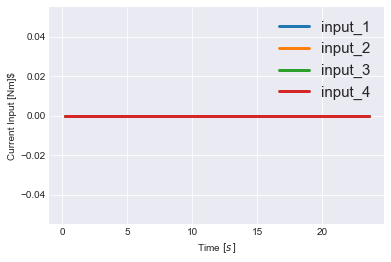

In [129]:
conv = 4096 / (1.2 / 0.01)
print('Quello che moltiplica il mio controllo è: ', conv)
#%%
plt.figure()
plt.ylabel(r'Current Input [Nm]$')
plt.xlabel(r'Time $[s]$')
plt.plot(time, current_input1/conv, label= 'input_1', linewidth=line_widt)
plt.plot(time, current_input2/conv, label= 'input_2', linewidth=line_widt)
plt.plot(time, current_input3/conv, label= 'input_3', linewidth=line_widt)
plt.plot(time, current_input4/conv, label= 'input_4', linewidth=line_widt)
plt.grid()
plt.legend(loc='best', shadow = True, fontsize=font_size)
plt.show() 

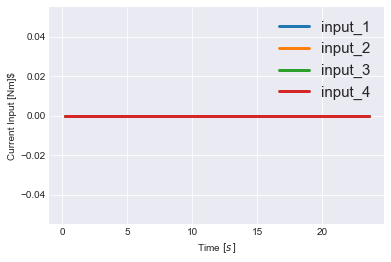

In [130]:
#%%
plt.figure()
plt.ylabel(r'Current Input [Nm]$')
plt.xlabel(r'Time $[s]$')
plt.plot(time, current_input1, label= 'input_1', linewidth=line_widt)
plt.plot(time, current_input2, label= 'input_2', linewidth=line_widt)
plt.plot(time, current_input3, label= 'input_3', linewidth=line_widt)
plt.plot(time, current_input4, label= 'input_4', linewidth=line_widt)
plt.grid()
plt.legend(loc='best', shadow = True, fontsize=font_size)
plt.show() 